Import necessary libraries

In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
image1 = cv2.imread('eb9931c3f39215a193826992d013a17a.jpg')

In [9]:
image2 = cv2.imread('eb9931c3f39215a193826992d013a17a.jpg',0)

In [10]:
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'image' is not defined

In [11]:
def showing(img):
    plt.imshow(img,cmap='grey')
    plt.axis('off')  
    plt.show()

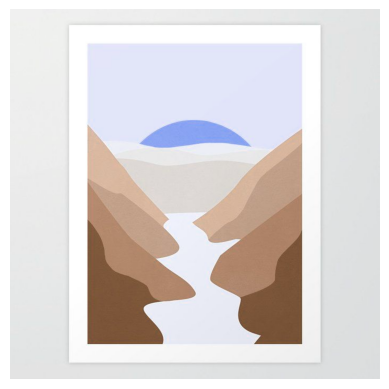

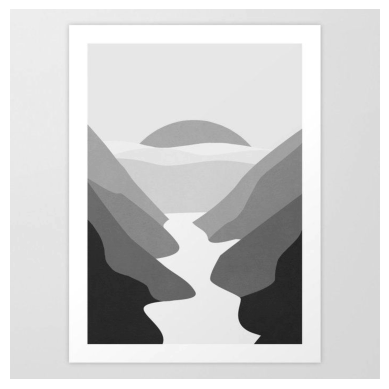

In [12]:
showing(image1)
showing(image2)

In [13]:
def imgsave(path,image):
    cv2.imwrite(path,image)
    

In [14]:
imgsave('E:/opencv-basics/Open-CV-basic-functions-/output1.jpg',image1)

In [15]:
imgsave('E:/opencv-basics/Open-CV-basic-functions-/output2.jpg',image2)

In [16]:
def details(image):
    print(image.shape)
    print(image.size)
    print(image.dtype)
    

In [17]:
details(image1)

(700, 700, 3)
1470000
uint8


In [18]:
details(image2)

(700, 700)
490000
uint8


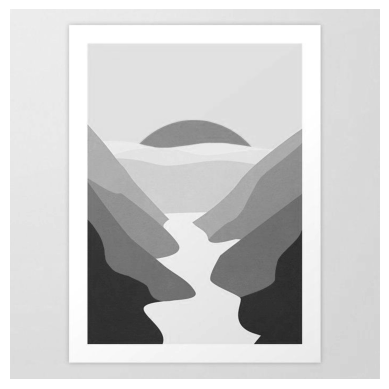

In [19]:
grayImage=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
showing(grayImage)

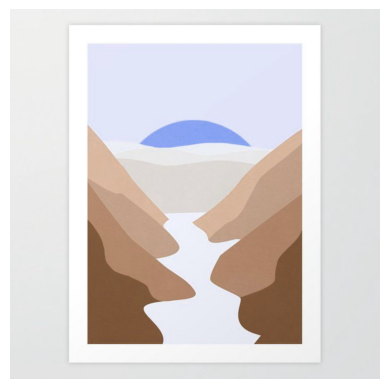

(1000, 1000, 3)


In [20]:
resizedImage=cv2.resize(image1,(1000,1000))
showing(resizedImage)
print(resizedImage.shape)

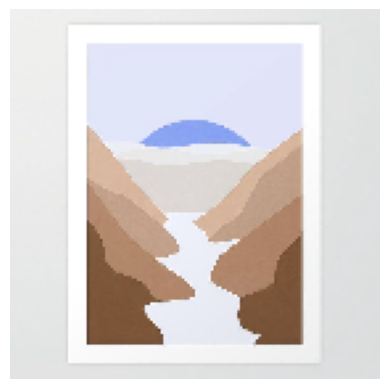

(140, 140, 3)


In [21]:
resizedImage=cv2.resize(image1,(0,0),fx=0.2,fy=0.2)
showing(resizedImage)

print(resizedImage.shape)

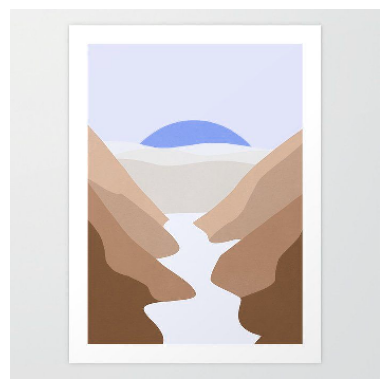

(350, 350, 3)


In [22]:
resizedImage=cv2.resize(image1,(0,0),fx=0.5,fy=0.5,interpolation=cv2.INTER_NEAREST)
showing(resizedImage)

print(resizedImage.shape)

In [23]:
(h,w)=image1.shape[0:2]
center=(w/2,h/2)
print(center)

(350.0, 350.0)


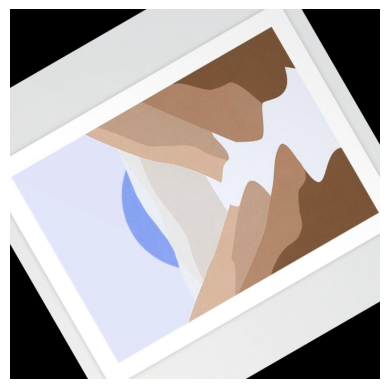

In [24]:
M=cv2.getRotationMatrix2D(center,120,1.0)
rotated=cv2.warpAffine(image1,M,(w,h))
showing(rotated)

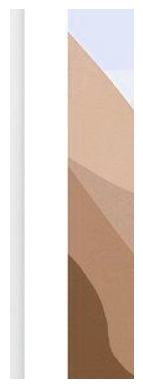

In [25]:
cropped=image1[200:500,100:200]
showing(cropped)

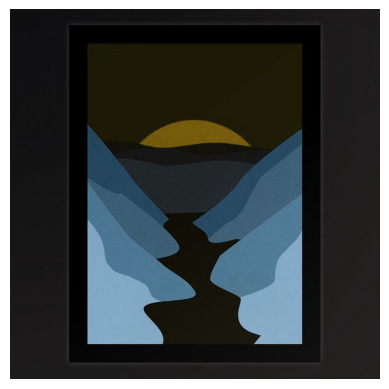

In [26]:
inverted=cv2.bitwise_not(image1)
showing(inverted)

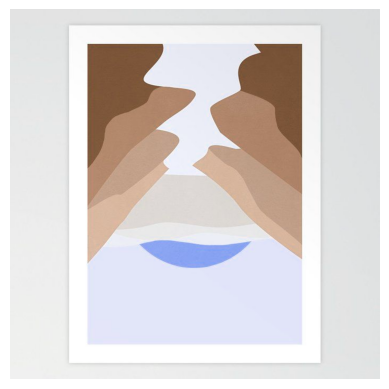

In [27]:
flipped=cv2.flip(image1,0)
showing(flipped)

In [28]:
df=pd.read_csv('Digits_Lab_01.csv')
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
reshaped_images=df.to_numpy().reshape(-1,28,28,1)


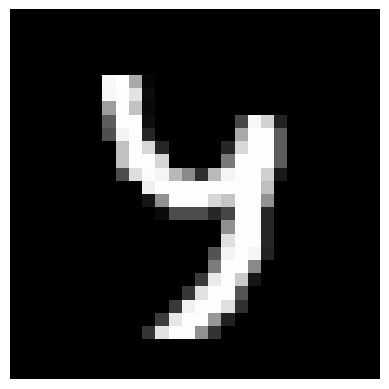

In [30]:
sample_img=np.array(reshaped_images[12]).reshape((28,28))
showing(sample_img)

In [31]:
row,col,chnl=image1.shape
print(row,col,chnl)

700 700 3


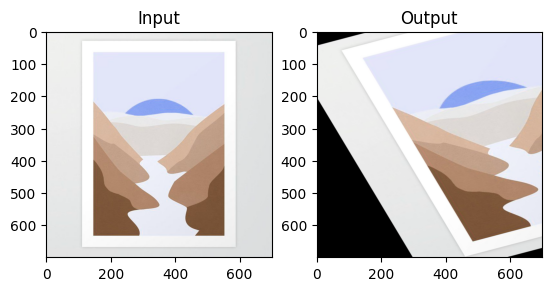

In [32]:
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])
M2=cv2.getAffineTransform(pts1,pts2)
dst=cv2.warpAffine(image1,M2,(col,row))
plt.subplot(121),plt.imshow(image1),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [33]:
def imcomplement(I):
    return 255 - I
    

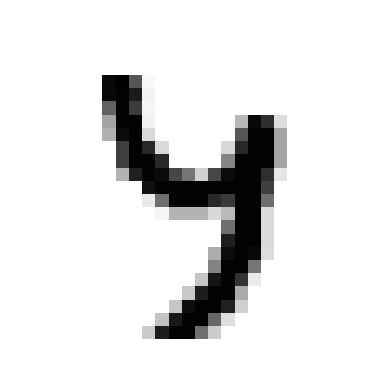

In [34]:
ic=imcomplement(sample_img)
showing(ic)

In [35]:
# flipud(I) - Flips image along x-axis
def flipud(I):
    if I.ndim < 1:
        raise ValueError("Input must be >= 1-d.")
    return I[::-1, ...]


In [36]:
def flipud(I):
    return np.flipud(I)

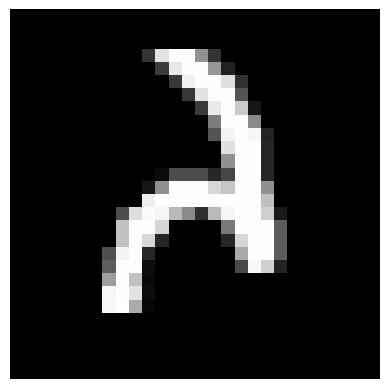

In [37]:
flipud1=flipud(sample_img)
showing(flipud1)

In [38]:
def fliplr(I):
    if I.ndim < 2:
        raise ValueError("Input must be >= 2-d.")
    return I[:, ::-1]

In [39]:
def fliplr(I):
    return np.fliplr(I)

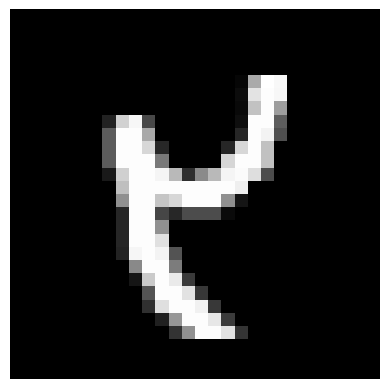

In [40]:
fliplr=fliplr(sample_img)
showing(fliplr)

In [41]:
def imresize(I, size):
    new_height, new_width = size
    height, width = I.shape
    resized_image = np.zeros((new_height, new_width), dtype=I.dtype)
 
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the nearest neighbor index
            nearest_i = int(i * height / new_height)
            nearest_j = int(j * width / new_width)
            resized_image[i, j] = I[nearest_i, nearest_j]
   
    return resized_image
 

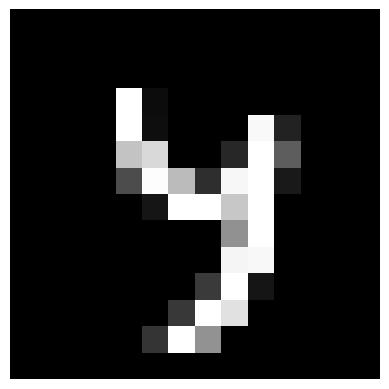

In [42]:
reim=imresize(sample_img,(14,14))
showing(reim)

In [43]:
def shear_image(I, shear_factor_x, shear_factor_y):
    h, w = I.shape[:2]
    M = np.float32([[1, shear_factor_x, 0], [shear_factor_y, 1, 0]])
    return cv2.warpAffine(I, M, (w, h))


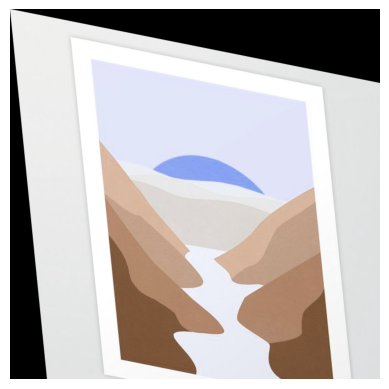

In [44]:
sheared_img=shear_image(image1,0.1,0.2)
showing(sheared_img)

In [45]:
def scale_image(I, fx, fy):
    return cv2.resize(I, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)


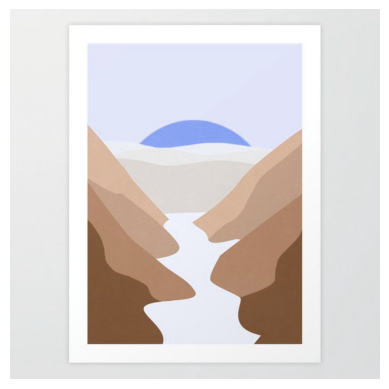

In [47]:
scaled_img=scale_image(image1,2,2)
showing(scaled_img)

In [67]:
def translate_image(I, x, y):
    h, w = I.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(I, M, (w, h))


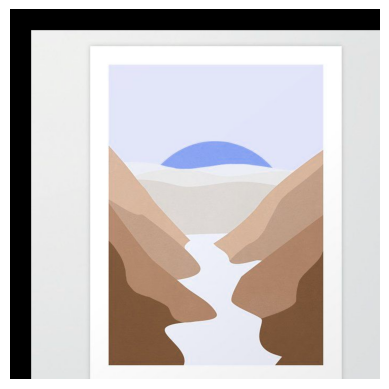

In [72]:
trns_img=translate_image(image1,40,40)
showing(trns_img)

In [73]:
def rotate_image(I, angle):
    h, w = I.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(I, M, (w, h))


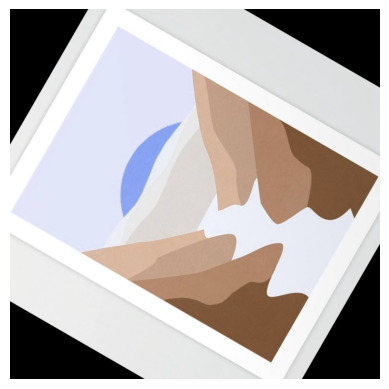

In [75]:
rot_img=rotate_image(image1,60)
showing(rot_img)

In [48]:
def affine_transform(I, src_points, dst_points):
    
    M = cv2.getAffineTransform(np.float32(src_points), np.float32(dst_points))
    h, w = I.shape[:2]
    transformed = cv2.warpAffine(I, M, (w, h))
    return transformed

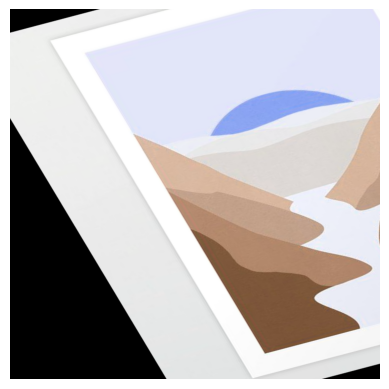

In [51]:
src_points = [[50, 50], [200, 50], [50, 200]]
dst_points = [[10, 100], [200, 50], [100, 250]]

at=affine_transform(image1,src_points,dst_points)
showing(at)

In [53]:
import cv2
import numpy as np

def projective_transform(I, src_points, dst_points):
    M = cv2.getPerspectiveTransform(np.float32(src_points), np.float32(dst_points))
    h, w = I.shape[:2]
    transformed = cv2.warpPerspective(I, M, (w, h))
    return transformed


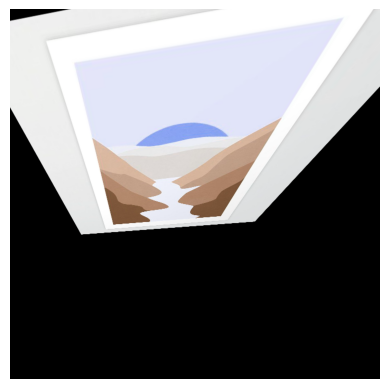

In [55]:
src_points = [[50, 50], [300, 50], [50, 300], [300, 300]]
dst_points = [[10, 100], [300, 50], [100, 300], [280, 280]]
pt=projective_transform(image1,src_points,dst_points)
showing(pt)

In [56]:
import cv2
import numpy as np

def euclidean_transform(I, angle, tx, ty):
    h, w = I.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)

    rotation_matrix[0, 2] += tx
    rotation_matrix[1, 2] += ty

    transformed = cv2.warpAffine(I, rotation_matrix, (w, h))
    return transformed


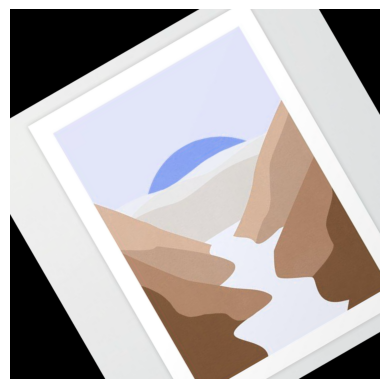

In [58]:
angle = 30    
tx, ty = 50, 30  

transformed_image = euclidean_transform(image1, angle, tx, ty)
showing(transformed_image)